## Неделя 1. Пятница 

### Математика. Градиентный спуск

In [ ]:
# Имортируй библиотеки
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 100
import numpy as np

### Анализ

❓Что значит, что производная в точке равна нулю? 

> ответ тут

Значит, что у фенкции в этой точке критическая точка. Т.е. Либо экстремумы, либо перелом.

Найдите производную функций ниже

1. $y = \dfrac{3x^7}{7}$

$y' = 3x^6$

2. $y = -7$

$y' = 0$

3. $y = \dfrac{9}{x}$

$y' = -\dfrac{9}{x^2}$

4. $y = 11 - 6x$

$y' = -6$

5. $y = 8\sqrt{x} + 7\sin{x}$

$y' = \dfrac{4}{\sqrt{x}} + 7\cos{x}$

6. $y = \dfrac{\sin{x}}{5x}$

$y' = \frac{x\cos x - \sin x}{5x^2}$

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "calculus tasks in progress"`
4. Выполни команду `git push`

### Градиентный спуск

### 📚 **Теоретическое введение:**
 
* В машинном и глубоком обучении градиентный спуск используется для минимизации функции потерь (loss function), которая показывает насколько модель ошибается в своих предсказаниях. 

* Для простоты концепции, мы попробуем минимизировать абстрактные функции, однако именно так и работает большинство моделей и все нейронные сети

#### 1. Градиентный спуск функции одного переменного

1. Задай функцию `loss`: она будет возвращать значение функции в точке. Для начала можно использовать простую функцию, например: 
$$L(\omega) = \omega^2 + 3$$

In [2]:
def loss(w):
    return w**2 + 3

2. Задай функцию `derivative` - она будет возвращать значение производной функции `loss` в точке. 

In [3]:
def derivative(w):
    return 2 * w

3. Задай функцию `step` - она будет возвращать новое значение весов по формуле:
$$w_{i+1} = w_i - \lambda \cdot \frac{\partial f(w)}{\partial w_i}$$

Входные аргументы: `w` - текущее значение параметра, `lambda` – скорость спуска. 

In [ ]:
def step(w, _lambda):
    """
    input:
        _lambda - learning rate

    returns:
        coord - w_coord
        loss_value  - y_coord
    """
    grad = derivative(w)
    coord = w - _lambda * grad
    loss_value = loss(coord)

    return coord, loss_value

4. Задай функцию `get_minima`, которая будет возвращать список, содержащий все значения параметра `w`, и список `loss_values`, который будет содержать значения функции `loss` для соответствующего параметра `w`. На вход функции поступает `w_0` – начальное значение параметра, `eps` – критерий останова. `lambda` - скорость спуска, которая будет передаваться в функцию `step`

In [ ]:
def get_minima(w_0, eps, _lambda):
    w_values = [w_0]
    loss_values = [loss(w_0)]
    w = w_0

    while True:
        w_new, loss_new = step(w, _lambda)

        w_values.append(w_new)
        loss_values.append(loss_new)

        if abs(w_new - w) < eps:
            break

        w = w_new

    return w_values, loss_values

Нарисуй график функции `loss`. По координатам, возвращенным функцией `get_minima` нарисуй график движения градиентного спуска. 

In [ ]:
w0 = 5.0
eps = 1e-6
lr = 0.2
w_path, L_path = get_minima(w0, eps, lr)

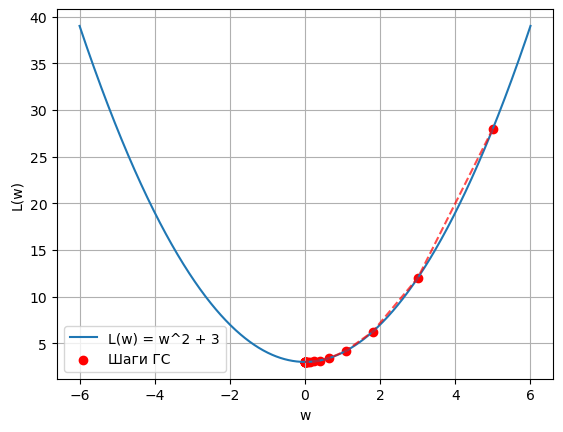

In [ ]:
w_grid = np.linspace(-6, 6, 1000)
L_grid = loss(w_grid)

plt.plot(w_grid, L_grid, label="L(w) = w^2 + 3")
plt.scatter(w_path, L_path, color="red", label="Шаги ГС")
plt.plot(w_path, L_path, linestyle="--", color="red", alpha=0.7)
plt.xlabel("w")
plt.ylabel("L(w)")
plt.legend()
plt.grid(True)
plt.show()

Нарисуй несколько графиков, соответствующих разным коэффициентам $\lambda$. 

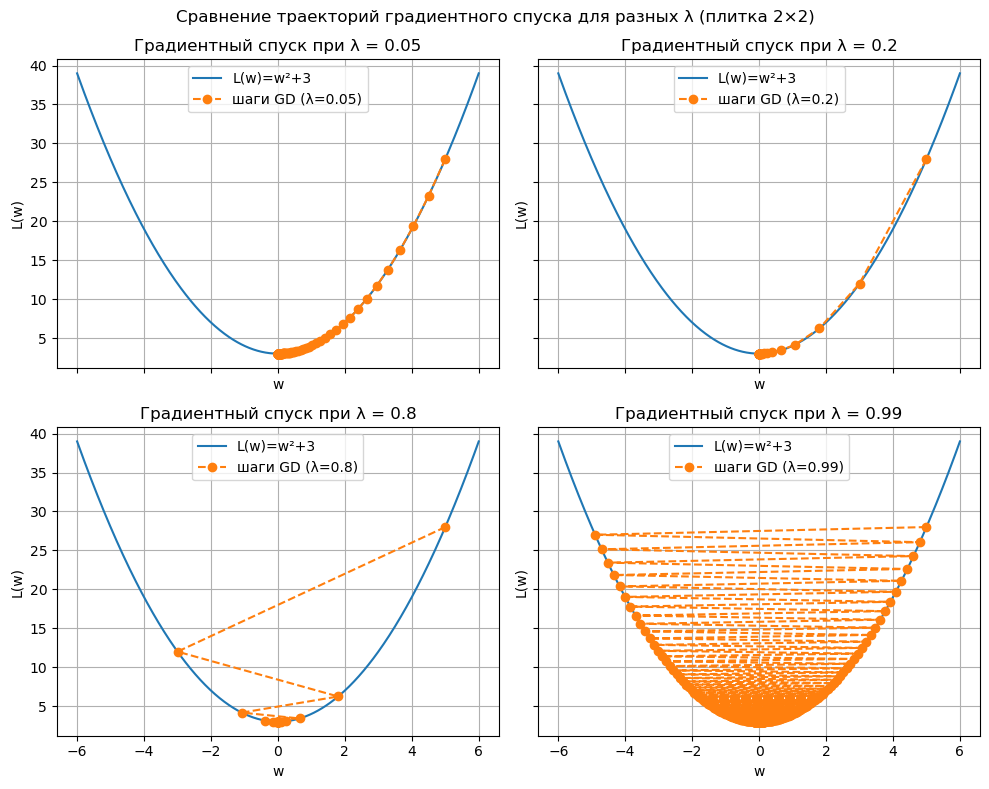

In [ ]:
# 1) Параметры эксперимента (только то, что нужно сейчас)
w0 = 5.0  # стартовое значение параметра w
eps = 1e-6  # критерий останова для get_minima
lambdas = [
    0.05,
    0.2,
    0.8,
    0.99,
]  # четыре λ для четырёх ячеек 2×2 (все безопасные: 0<λ<1)

# 2) Заранее считаем "фон": плавную кривую L(w) на общем диапазоне оси w
w_grid = np.linspace(-6, 6, 500)  # равномерная сетка аргумента w
L_grid = loss(w_grid)  # значения функции потерь на этой сетке

# 3) Создаём фигуру с сеткой подграфиков 2×2
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
axes = axes.ravel()  # превращаем 2×2 матрицу осей в плоский список [ax0, ax1, ax2, ax3]

# 4) Для каждого λ строим отдельный подграфик
for ax, lr in zip(axes, lambdas):
    try:
        # 4.1) Получаем траекторию градиентного спуска для данного λ
        w_path, L_path = get_minima(w0, eps, lr)

        # 4.2) Рисуем фон: саму функцию L(w)
        ax.plot(w_grid, L_grid, label="L(w)=w²+3")

        # 4.3) Сверху — траекторию: точки шагов и пунктирная ломаная по этим точкам
        ax.plot(w_path, L_path, linestyle="--", marker="o", label=f"шаги GD (λ={lr})")

        # 4.4) Оформление подпотребностей
        ax.set_title(f"Градиентный спуск при λ = {lr}")
        ax.set_xlabel("w")
        ax.set_ylabel("L(w)")
        ax.grid(True)
        ax.legend(loc="best")

    except OverflowError as e:
        # Если вдруг захочешь поставить "опасный" λ (≥1) — аккуратно поясним на графике
        ax.plot(w_grid, L_grid, label="L(w)=w²+3")
        ax.text(0.05, 0.9, f"Overflow для λ={lr}", transform=ax.transAxes)
        ax.set_title(f"λ = {lr} (расходимость)")
        ax.set_xlabel("w")
        ax.set_ylabel("L(w)")
        ax.grid(True)
        ax.legend(loc="best")

# 5) Компоновка без наезда элементов
fig.suptitle(
    "Сравнение траекторий градиентного спуска для разных λ (плитка 2×2)", y=0.98
)
plt.tight_layout()
plt.show()

❓ Как выбрать оптимальную скорость обучения?

> _ответ тут_

Методом проб и ошибок?

❓Будет ли зависеть скорость работы всей процедуры от начального выбора значения искомого параметра?

> ответ тут

Да, будет зависеть. Чем дальше стартовое значение от минимума, тем больше шагов понадобится, чтобы дойти до маленьких значений

Поэкспериментируй с результатом, задай функцию: 
$$L(\omega) = \omega^2 - \omega$$

In [ ]:
def loss(w):
    return w**2 - w


def derivative(w):
    return 2 * w - 1

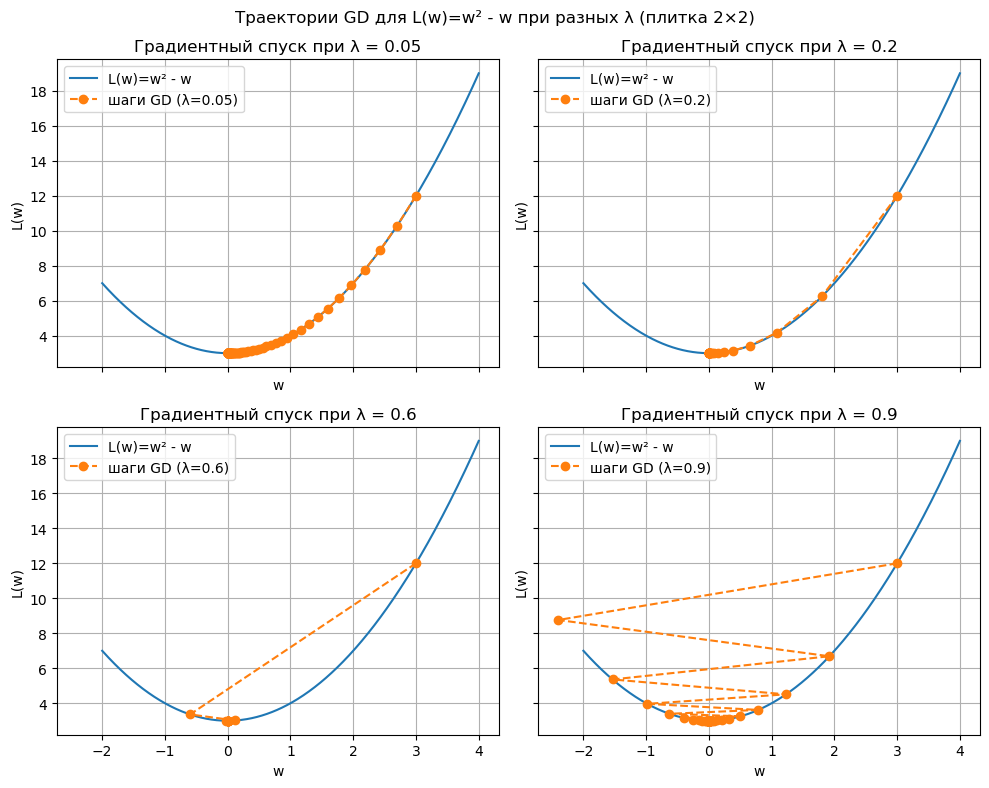

In [19]:
# ⚙️ Параметры эксперимента
w0 = 3.0  # стартовое значение параметра w (можно менять и смотреть, что будет)
eps = 1e-6  # порог остановки для get_minima
lambdas = [
    0.05,
    0.2,
    0.6,
    0.9,
]  # четыре скорости обучения λ (все в диапазоне 0<λ<1 → гарантирует сходимость)

# Фон: кривая L(w) на общем диапазоне, чтобы было видно, куда «едем»
w_grid = np.linspace(
    -2, 4, 600
)  # диапазон по оси w c запасом вокруг старта и минимума 0.5
L_grid = loss(w_grid)  # значения новой функции потерь на сетке

# Создаём фигуру с сеткой подграфиков 2×2 (каждый λ — свой маленький график)
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
axes = axes.ravel()  # превращаем матрицу осей в плоский список для удобного обхода

for ax, lr in zip(axes, lambdas):
    # 1) получаем траекторию по твоей get_minima (она должна вызвать step, который использует derivative/loss выше)
    w_path, L_path = get_minima(w0, eps, lr)

    # 2) рисуем фон: график самой L(w)
    ax.plot(w_grid, L_grid, label="L(w)=w² - w")

    # 3) поверх — траекторию: точки (шаги) и пунктирная ломаная
    ax.plot(w_path, L_path, linestyle="--", marker="o", label=f"шаги GD (λ={lr})")

    # 4) подписи и оформление
    ax.set_title(f"Градиентный спуск при λ = {lr}")
    ax.set_xlabel("w")
    ax.set_ylabel("L(w)")
    ax.grid(True)
    ax.legend(loc="best")

fig.suptitle("Траектории GD для L(w)=w² - w при разных λ (плитка 2×2)", y=0.98)
plt.tight_layout()
plt.show()

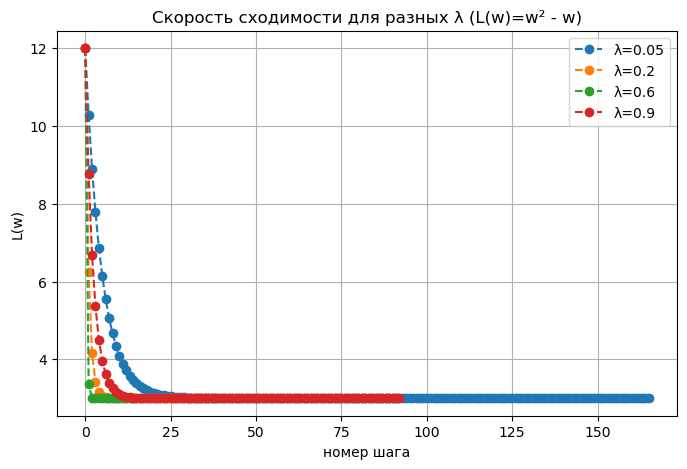

In [ ]:
w0 = 3.0
eps = 1e-8
lambdas = [0.05, 0.2, 0.6, 0.9]

plt.figure(figsize=(8, 5))
for lr in lambdas:
    w_path, L_path = get_minima(w0, eps, lr)  # берём те же траектории
    iters = np.arange(len(L_path))  # ось шагов: 0,1,2,...
    plt.plot(iters, L_path, marker="o", linestyle="--", label=f"λ={lr}")

plt.xlabel("номер шага")
plt.ylabel("L(w)")
plt.title("Скорость сходимости для разных λ (L(w)=w² - w)")
plt.grid(True)
plt.legend()
plt.show()

#### 2. Градиентный спуск для функции двух переменных

1. Модифицируй функции из предыдущего задания и реализуй поиск минимума функции двух переменных. 
Функция для минимизации: 
$$\mathcal{L} (\omega_1, \omega_2) = \omega_1^2 + 2\omega_2^2 - 3\omega_1 - 4\omega_2$$

В конце визуализируй результат аналогично предыдущему заданию.


__P.S__: для данной функции, минимальное значение достигается в точке $(\dfrac{3}{2}; 1)$. Это необходимо для самопроверки

In [ ]:
def loss2(w1, w2):
    return w1**2 + 2 * (w2**2) - 3 * w1 - 4 * w2

In [ ]:
def grad2(w1, w2):
    g1 = 2 * w1 - 3
    g2 = 4 * w2 - 4
    return np.array([g1, g2])

In [ ]:
def step2(w_vec, lr):
    g = grad2(w_vec[0], w_vec[1])
    w_new = w_vec - lr * g
    L_new = loss2(w_new[0], w_new[1])
    return w_new, L_new

In [ ]:
def get_minima2(w0, eps, lr, max_iter=10_000):
    w_list = [np.array(w0, dtype=float)]
    L_list = [loss2(w0[0], w0[1])]

    w = np.array(w0, dtype=float)
    for _ in range(max_iter):
        w_new, L_new = step2(w, lr)
        w_list.append(w_new)
        L_list.append(L_new)
        if np.linalg.norm(w_new - w) < eps:
            break
        w = w_new

    return w_list, L_list

In [ ]:
w0 = [3.0, -1.0]
eps = 1e-8
lr = 0.2

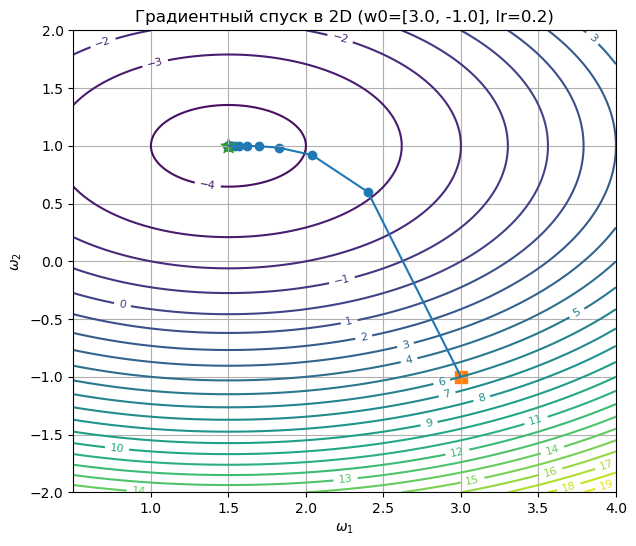

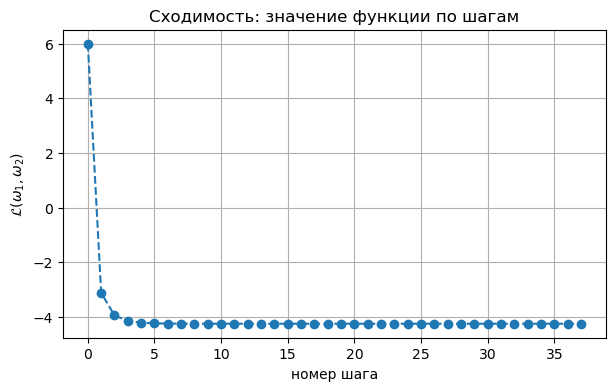

In [ ]:
# Считаем траекторию
w_path, L_path = get_minima2(w0, eps, lr)

# ==== 6) Визуализация №1: уровень L(w1, w2) (контуры) + траектория GD ====
# 6.1) Строим сетку вокруг траектории с небольшим "паддингом"
w1_vals = [w[0] for w in w_path]
w2_vals = [w[1] for w in w_path]

pad1 = max(1.0, 0.2 * (max(w1_vals) - min(w1_vals) + 1e-12))
pad2 = max(1.0, 0.2 * (max(w2_vals) - min(w2_vals) + 1e-12))

w1_min, w1_max = min(w1_vals) - pad1, max(w1_vals) + pad1
w2_min, w2_max = min(w2_vals) - pad2, max(w2_vals) + pad2

W1, W2 = np.meshgrid(np.linspace(w1_min, w1_max, 300), np.linspace(w2_min, w2_max, 300))
Z = loss2(W1, W2)

# 6.2) Рисуем контурный график и поверх траекторию
plt.figure(figsize=(7, 6))
cs = plt.contour(W1, W2, Z, levels=25)  # линии уровней L(w1,w2)
plt.clabel(cs, inline=True, fontsize=8)

# Траектория GD (ломаная) + точки шагов
plt.plot(w1_vals, w2_vals)  # траектория
plt.scatter(w1_vals, w2_vals, marker="o")  # маркеры шагов

# Отметим старт и финиш
plt.scatter([w1_vals[0]], [w2_vals[0]], marker="s", s=80)  # старт (квадрат)
plt.scatter([w1_vals[-1]], [w2_vals[-1]], marker="*", s=120)  # финал (звезда)

plt.title(f"Градиентный спуск в 2D (w0={w0}, lr={lr})")
plt.xlabel(r"$\omega_1$")
plt.ylabel(r"$\omega_2$")
plt.grid(True)
plt.show()

# ==== 7) Визуализация №2: значение L по шагам (динамика сходимости) ====
iters = np.arange(len(L_path))

plt.figure(figsize=(7, 4))
plt.plot(iters, L_path, marker="o", linestyle="--")
plt.xlabel("номер шага")
plt.ylabel(r"$\mathcal{L}(\omega_1,\omega_2)$")
plt.title("Сходимость: значение функции по шагам")
plt.grid(True)
plt.show()

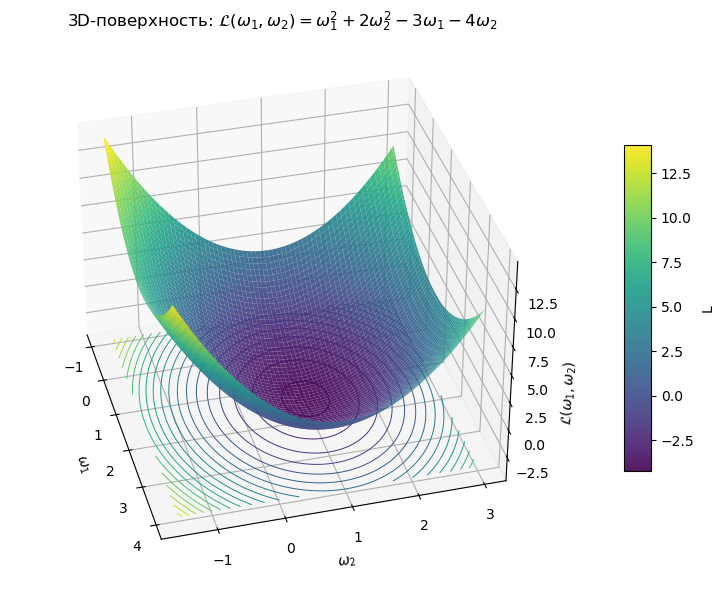

In [28]:
from matplotlib import cm  # цветовые карты для 3D

# 1) Готовим диапазоны по осям ω1 и ω2
w1_min, w1_max = -1.0, 4.0  # можно подогнать под свои траектории
w2_min, w2_max = -1.5, 3.0

w1 = np.linspace(w1_min, w1_max, 200)  # равномерная сетка по ω1
w2 = np.linspace(w2_min, w2_max, 200)  # равномерная сетка по ω2
W1, W2 = np.meshgrid(w1, w2)  # двумерная сетка координат

# 2) Считаем значения функции на сетке (поверхность Z = L(W1, W2))
Z = loss2(W1, W2)

# 3) Создаём 3D‑ось и рисуем поверхность
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection="3d")

# Полупрозрачная поверхность; cmap можно менять (cm.viridis, cm.plasma и т.д.)
surf = ax.plot_surface(
    W1, W2, Z, rstride=3, cstride=3, cmap=cm.viridis, alpha=0.9, linewidth=0
)

# 4) Дополнительно — контуры «на полу» (проекция изолиний на плоскость Z=min(Z))
z0 = Z.min()
ax.contour(W1, W2, Z, zdir="z", offset=z0, levels=20, linewidths=0.7)

# 5) Подписи осей и заголовок
ax.set_xlabel(r"$\omega_1$")
ax.set_ylabel(r"$\omega_2$")
ax.set_zlabel(r"$\mathcal{L}(\omega_1,\omega_2)$")
ax.set_title(
    r"3D‑поверхность: $\mathcal{L}(\omega_1,\omega_2)=\omega_1^2+2\omega_2^2-3\omega_1-4\omega_2$"
)

# 6) Немного улучшим ракурс и добавим цветовую шкалу
ax.view_init(elev=35, azim=-15)  # угол обзора (можно поиграть)
fig.colorbar(surf, shrink=0.6, aspect=12, pad=0.08, label="L")

plt.tight_layout()
plt.show()

In [ ]:
# 3. Гессиан (матрица вторых производных)
#    [[ d^2L/dw1^2 , d^2L/dw1dw2 ],
#     [ d^2L/dw2dw1, d^2L/dw2^2 ]]
#    Для этой функции = [[2, 0], [0, 4]]
def hessian2():
    return np.array([[2.0, 0.0], [0.0, 4.0]], dtype=float)


# 4. Точка-кандидат на минимум (нашли вручную из grad=0)
w_star = np.array([1.5, 1.0], dtype=float)

# --- Проверки ---
# a) Градиент в точке (должен быть [0, 0])
g_at_star = grad2(*w_star)

# b) Собственные числа Гессиана (оба > 0 для минимума)
H = hessian2()
eigvals = np.linalg.eigvals(H)

# c) Значение функции в этой точке
L_at_star = loss2(*w_star)

# d) Численная проверка на сетке вокруг точки
delta = 0.2
w1_lin = np.linspace(w_star[0] - delta, w_star[0] + delta, 9)
w2_lin = np.linspace(w_star[1] - delta, w_star[1] + delta, 9)
W1, W2 = np.meshgrid(w1_lin, w2_lin)
Z = loss2(W1, W2)
Z_min = Z.min()
Z_min_loc = np.unravel_index(np.argmin(Z), Z.shape)
w1_min_num = W1[Z_min_loc]
w2_min_num = W2[Z_min_loc]

# --- Вывод ---
print("Градиент в точке w* = (3/2, 1):", g_at_star)
print("Собственные числа Гессиана:", eigvals)
print("Положительно определённый Гессиан? ->", np.all(eigvals > 0))
print("Значение функции в точке w*:", L_at_star)
print(
    "Минимум по небольшой сетке вокруг w*:",
    Z_min,
    "в точке (примерно):",
    (w1_min_num, w2_min_num),
)

Градиент в точке w* = (3/2, 1): [0. 0.]
Собственные числа Гессиана: [2. 4.]
Положительно определённый Гессиан? -> True
Значение функции в точке w*: -4.25
Минимум по небольшой сетке вокруг w*: -4.25 в точке (примерно): (np.float64(1.5), np.float64(1.0))


<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "calculus tasks done"`
4. Выполни команду `git push`

#### 3. Дополнительное задание. 

#### Адаптивная скорость обучения

Модифицируй одну из предыдущих реализаций, добавив [адаптивный подбор скорости обучения](https://en.wikipedia.org/wiki/Learning_rate) (time-based, step-based, exponential)

In [ ]:
# code

#### Решение системы линейных уравнений с помощью градиентного спуска


Реализуй класс `Solver` для вычисления решения системы линейных уравнений произвольного размера.  

Логика работы класса должна быть следующей: 

```python

solver = Solver(X, y)
solver.fit(learning_rate=0.01, n_iter=10)
print(solver.mse())
>>> Mean squared error: 0.00313
print(solver.coef_)
>>> [.5, 1, -2]

```

`X` – матрица системы

`y` – вектор ответов

`learning_rate` – шаг градинтного спуска

`n_iter` - число итераций. 

Метод `mse` вычисляет среднеквадратическую ошибку: `sum((y - X@w)**2) / len(w)`, где `w` - искомый вектор коэффициентов. 

Попробуй решить с помощью реализованного класса систему уравнений:
$$
\begin{cases}
2w_1 + 3w_2 - w_3 = 9 \\
w_1 -2w_2 + w_3 = 3 \\
w_1 + 2w_3 = 2
\end{cases}
$$

Решение уравнения выше – 4, 0, -1. Значения, которые ты получишь в процессе оптимизации могут незначительно отличаться. 


In [ ]:
X = np.array([[2, 3, -1], [1, -2, 1], [1, 0, 2]])

y = np.array([9, 3, 2])

In [154]:
# code

In [152]:
solver = Solver(X, y)
solver.fit(0.1, 100)
solver.mse()

#### Реализация класса оптимизатора

Реализуй класс, который `Optimizer`, который будет решать задачу минимизации функции, сохранения истории процедуры, визуализации и возможностью выбирать один из типов управления скоростью обучения. Добавь возможность задания параметра для реализации остановки. 

In [ ]:
class Optimizer:
    pass

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Сохрани файл для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "calculus tasks completed"`
4. Выполни команду `git push`